# Predicting a single image

In [194]:
import cv2
import tensorflow as tf
from keras.models import load_model
from PIL import Image
import numpy as np

CATEGORIES = ["handwritten", "printed"]  

def prepare(filepath):
    IMG_SIZE = 224  
    img_array = cv2.imread(filepath)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
    return new_array



model = load_model('vgg_train3_1.h5') #enter the image link. 
image_path = 'Data/validation/handwritten.138.png'


prediction = model.predict([prepare(image_path)]) 
threshold = 0.5
pre_test = int(np.where(prediction > threshold,1,0))
print(prediction)
print(CATEGORIES[pre_test])



[[0.99909294]]
printed


# Function for Prediction

In [83]:
import cv2
import tensorflow as tf
from keras.models import load_model
from PIL import Image
import numpy as np

CATEGORIES = ["handwritten", "printed"]  

def prepare(filepath):
    IMG_SIZE = 224  
    img_array = cv2.imread(filepath)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
    return new_array



model = load_model('vgg_700_98.h5') #enter the image link. 

def pred(image_path):
    prediction = model.predict([prepare(image_path)]) 
    threshold = 0.5
    pre_test = int(np.where(prediction > threshold,1,0))
    predict = CATEGORIES[pre_test]
    #print(prediction)
    return predict

pred('Data/Handwritten/handwritten.268.png')

'printed'

# Prediction for a folder

In [195]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
image_size = 224
batch_size = 16
from keras.models import load_model
pd.options.display.max_rows = 100
model = load_model('vgg_train3_1.h5')

In [196]:
test_filenames = os.listdir("Data/validation1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [197]:
test_gen = ImageDataGenerator()
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Data/validation1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False
)

Found 30 validated image filenames.


In [198]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [199]:
predict

array([[9.9396658e-01],
       [0.0000000e+00],
       [5.2392483e-05],
       [3.8743019e-07],
       [5.6367815e-03],
       [4.5236349e-03],
       [9.4321001e-01],
       [4.3519437e-03],
       [9.9791050e-01],
       [1.9371510e-06],
       [8.2481444e-02],
       [4.3510079e-02],
       [5.7945192e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.4057525e-01],
       [9.9980026e-01]], dtype=float32)

In [200]:
threshold = 0.5
test_df['category'] = np.where(predict > threshold,1,0)

In [201]:
test_df

,filename,category
0,handwritten.383.png,1
1,handwritten.382.png,0
2,handwritten.394.png,0
3,handwritten.380.png,0
4,handwritten.381.png,0
5,handwritten.391.png,0
6,handwritten.385.png,1
7,handwritten.384.png,0
8,handwritten.390.png,1
9,handwritten.386.png,0


In [202]:
test_df["category"] = test_df["category"].replace({0: 'Handwritten', 1: 'Printed'})


In [203]:

test_df

,filename,category
0,handwritten.383.png,Printed
1,handwritten.382.png,Handwritten
2,handwritten.394.png,Handwritten
3,handwritten.380.png,Handwritten
4,handwritten.381.png,Handwritten
5,handwritten.391.png,Handwritten
6,handwritten.385.png,Printed
7,handwritten.384.png,Handwritten
8,handwritten.390.png,Printed
9,handwritten.386.png,Handwritten


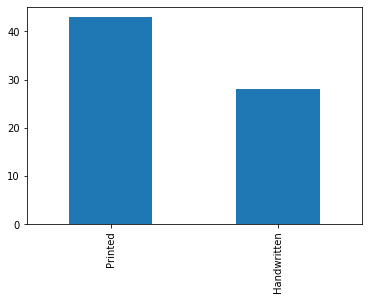

In [186]:
test_df['category'].value_counts().plot.bar()

In [50]:
count = test_df.groupby('category').count()
print(count)

             filename
category             
Handwritten        10
Printed            61


In [51]:
test_df[test_df['category'] == 'Printed']

,filename,category
0,handwritten.383.png,Printed
1,handwritten.142.png,Printed
2,printed.243.jpg,Printed
3,printed.242.jpg,Printed
4,handwritten.143.png,Printed
5,handwritten.382.png,Printed
7,handwritten.380.png,Printed
8,handwritten.141.png,Printed
9,printed.240.jpg,Printed
10,printed.241.jpg,Printed
